<a href="https://colab.research.google.com/github/vikramkrishnan9885/MyColab/blob/master/SingleObjectDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install xlrd

# Image Classification vs Object Detection : Which one to use?
Typically, image classification is used in applications where there is only one object in the image. There could be multiple classes (e.g. cats, dogs, etc.) but usually, there is only one instance of that class in the image.

In most applications where there are more than one objects in the input image, we need to find the location of the objects, and then classify them. We use an object detection algorithm in such cases.

Object detection can be hundreds of times slower than image classification, and therefore, in applications where the location of the object in the image is not important, we use image classification.

# Object Detection
We can think of object detection as a two-step process

Find bounding boxes containing objects such that each bounding box has only one object.
Classify the image inside each bounding box and assign it a label.
In the next few sections, we will cover steps that led to the development of Faster R-CNN object detection architecture.

## Sliding Window Approach
Most classical computer vision techniques for object detection like HAAR cascades and HOG + SVM use a sliding window approach for detecting objects.

In this approach, a sliding window is moved over the image, and all the pixels inside that sliding window are cropped out and sent to an image classifier.

If the image classifier identifies a known object, the bounding box and the class label are stored. Otherwise, the next window is evaluated.

The sliding window approach is computationally very expensive because to detect objects in an input image, sliding windows at different scales and aspect ratios need to be evaluated at every pixel in the image.

As a result, sliding windows are used only when we are detecting a single object class with a fixed aspect ratio. For example, the HOG + SVM or HAAR based face detector in OpenCV uses a sliding window approach. In case of a face detector, the complexity is manageable because only square bounding boxes are evaluated at different scales.

## R-CNN Object Detector
Convolutional Neural Network (CNN) based image classifiers became popular after a CNN based method won the ImageNet Large Scale Visual Recognition Challenge (ILSVRC) in 2012.

Because every object detector has an image classifier at its heart, the invention of a CNN based object detector became inevitable.

There were two problems that needed to be overcome though

CNN based image classifiers were computationally very expensive compared traditional techniques like HOG + SVM or HAAR cascades.
The computer vision community was growing more ambitious. People wanted to build a multi-class object detector that could handle different aspect ratios in addition to different scales.
Therefore, a sliding window based approach for object detection was ruled out. It was just too expensive.

Researchers started working on a new idea of training a machine learning model that could propose locations of bounding boxes that contained objects. These bounding boxes were called Region Proposals or Object Proposals.

Region proposals were merely lists of bounding boxes with a small probability of containing an object. It did not know or care which object was contained in the bounding box.

A region proposal algorithm outputs a list of a few hundred bounding boxes at different locations, scales, and aspect ratios. Most of these bounding boxes do NOT contain any object.

Why are region proposals still useful?

Evaluating the image classifier at a few hundred bounding boxes proposed by the region proposal algorithm is much cheaper than evaluating it at hundreds of thousands or even millions of bounding boxes in case of the sliding window approach.

One of the first approaches that used region proposals was called R-CNN ( short for Regions with CNN features) by Ross Girshick et al.

They used an algorithm called Selective Search to detect 2000 region proposals and ran a CNN + SVM based image classifier on these 2000 bounding boxes.

The accuracy of R-CNN at that time was the state of the art, but the speed was still very slow ( 18-20 seconds per image on a GPU )

## Fast R-CNN Object Detector
In R-CNN each bounding box was independently classified by the image classifier. There were 2000 region proposals and the image classifier calculated a feature map for each region proposal. This process was expensive.

In the followup work by Ross Girshick, he proposed a method called Fast R-CNN that significantly sped up object detection.

The idea was to calculate a single feature map for the entire image instead of 2000 feature maps for 2000 region proposals. For each region proposal, a region of interest (RoI) pooling layer extracted a fixed-length feature vector from the feature map. Each feature vector was then used to for two purposes

Classify the region into one of the classes ( e.g. dog, cat, background ).
Improve the accuracy of the original bounding box using a bounding box regressor.


## Faster R-CNN Object Detector
In Fast R-CNN, even though the computation for classifying 2000 region proposals was shared, the part of the algorithm that generated region proposals did not share any computation with the part that performed image classification.

In the followup work called Faster R-CNN, the main insight was that the two parts — calculating region proposals and image classification — could use the same feature map and therefore share the computational load.

A Convolutional Neural Network was used to produce a feature map of the image which was simultaneously used for training a region proposal network and an image classifier. Because of this shared computation, there was a significant improvement in the speed of object detection.

https://www.learnopencv.com/faster-r-cnn-object-detection-with-pytorch/


# Book Example

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!unzip '/content/drive/My Drive/amd/iChallenge-AMD-Training400.zip'

Archive:  /content/drive/My Drive/amd/iChallenge-AMD-Training400.zip
   creating: Training400/
   creating: Training400/AMD/
  inflating: Training400/AMD/A0001.jpg  
  inflating: Training400/AMD/A0002.jpg  
  inflating: Training400/AMD/A0003.jpg  
  inflating: Training400/AMD/A0004.jpg  
  inflating: Training400/AMD/A0005.jpg  
  inflating: Training400/AMD/A0006.jpg  
  inflating: Training400/AMD/A0007.jpg  
  inflating: Training400/AMD/A0008.jpg  
  inflating: Training400/AMD/A0009.jpg  
  inflating: Training400/AMD/A0010.jpg  
  inflating: Training400/AMD/A0011.jpg  
  inflating: Training400/AMD/A0012.jpg  
  inflating: Training400/AMD/A0013.jpg  
  inflating: Training400/AMD/A0014.jpg  
  inflating: Training400/AMD/A0015.jpg  
  inflating: Training400/AMD/A0016.jpg  
  inflating: Training400/AMD/A0017.jpg  
  inflating: Training400/AMD/A0018.jpg  
  inflating: Training400/AMD/A0019.jpg  
  inflating: Training400/AMD/A0020.jpg  
  inflating: Training400/AMD/A0021.jpg  
  inflating: T

In [0]:
!mv '/content/drive/My Drive/amd/Fovea_location.xlsx' ./Training400/

In [4]:
import os
import pandas as pd

path2data="./"

path2labels=os.path.join(path2data,"Training400","Fovea_location.xlsx")

# make sure to install xlrd
labels_df=pd.read_excel(path2labels,index_col="ID")

labels_df.head()

,imgName,Fovea_X,Fovea_Y
ID,,,
1,A0001.jpg,1182.264278,1022.018842
2,A0002.jpg,967.754046,1016.946655
3,A0003.jpg,1220.206714,989.944033
4,A0004.jpg,1141.140888,1000.594955
5,A0005.jpg,1127.371832,1071.109440


Object detection is the process of finding locations of specific objects in images. Depending on the number of objects in images, we may deal with single-object or multi-object detection problems. This chapter will focus on developing a deep learning model using PyTorch to perform single-object detection. In single-object detection, we are attempting to locate only one object in a given image. 

We can represent a bounding box with four numbers in one of the following formats:

* [x0, y0, w, h]
* [x0, y0, x1, y1]
* [xc, yc, w, h]

Here, the preceding elements represent the following:

* x0, y0: The coordinates of the top left of the bounding box
* x1, y1: The coordinates of the bottom right of the bounding box
* w, h: The width and height of the bounding box
* xc, yc: The coordinates of the centroid of the bounding box

### Scatter plot of the Fovea_X and Fovea_Y coordinates:

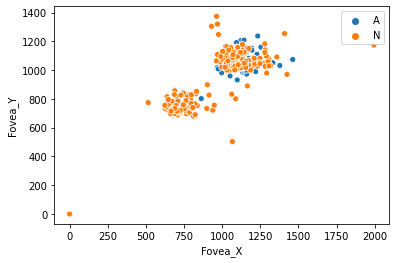

In [6]:
# make sure seaborn is installed!
import seaborn as sns
%matplotlib inline

AorN=[imn[0] for imn in labels_df.imgName]
sns.scatterplot(x=labels_df['Fovea_X'], y=labels_df['Fovea_Y'],hue=AorN)

### Show a few sample images

[ 73 371 160 294 217 191]
(2124, 2056) (1037.89889229694, 1115.71768088143)
(1444, 1444) (635.148992978281, 744.648850248249)
(1444, 1444) (639.360312038611, 814.762764100936)
(2124, 2056) (1122.08407442503, 1067.58829793991)
(2124, 2056) (1092.93333646222, 1055.15333296773)
(2124, 2056) (1112.50135915347, 1070.7251775623)


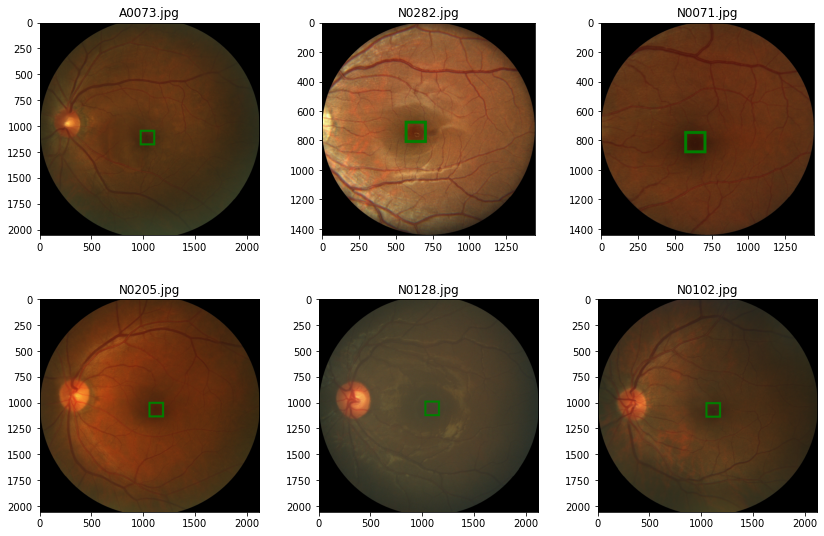

In [7]:
import numpy as np
from PIL import Image, ImageDraw
import matplotlib.pylab as plt

# fix random seed
np.random.seed(2019)

# we will set the plot parameters:
plt.rcParams['figure.figsize'] = (15, 9)
plt.subplots_adjust(wspace=0, hspace=0.3)
nrows,ncols=2,3


# we will select a random set of image ids:
# get imgName column
imgName=labels_df["imgName"]

# get ids
ids=labels_df.index

# select random ids
rndIds=np.random.choice(ids,nrows*ncols)
print(rndIds)


# Next, we will define a helper function to load an image and its label from the local files:
def load_img_label(labels_df,id_):    
    imgName=labels_df["imgName"]    
    if imgName[id_][0]=="A":
        prefix="AMD"
    else:
        prefix="Non-AMD"
            
    fullPath2img=os.path.join(path2data,"Training400",prefix,imgName[id_])
    img = Image.open(fullPath2img)
    
    # centroid
    x=labels_df["Fovea_X"][id_]
    y=labels_df["Fovea_Y"][id_]
    
    label=(x,y)
    return img,label


# Next, we will define a helper function to show the image and label as a bounding box:
def show_img_label(img,label,w_h=(50,50),thickness=2):   
    w,h=w_h                   
    cx,cy=label
    
    # draw a rectangle 
    draw = ImageDraw.Draw(img)
    draw.rectangle(((cx-w/2, cy-h/2), (cx+w/2, cy+h/2)),outline="green",width=thickness)

    plt.imshow(np.asarray(img))


# Then, we will show the selected images together with the fovea bounding boxes:
for i,id_ in enumerate(rndIds):
    
    img,label=load_img_label(labels_df,id_)   
    print(img.size,label)
    
    plt.subplot(nrows, ncols, i+1) 
    show_img_label(img,label,w_h=(150,150),thickness=20)
    plt.title(imgName[id_])

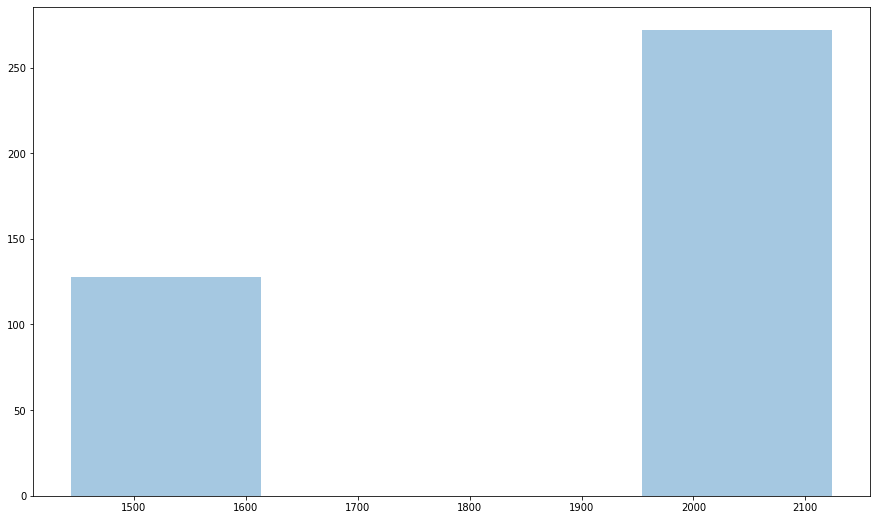

In [9]:
# Next, we will collect the image widths and heights in two lists:
h_list,w_list=[],[]
for id_ in ids:
    if imgName[id_][0]=="A":
        prefix="AMD"
    else:
        prefix="Non-AMD"
    fullPath2img=os.path.join(path2data,"Training400",prefix,imgName[id_])
    img = Image.open(fullPath2img)
    h,w=img.size
    h_list.append(h)
    w_list.append(w)


# Then, we will plot the distributions of heights and widths:

sns.distplot(a=h_list, kde=False)

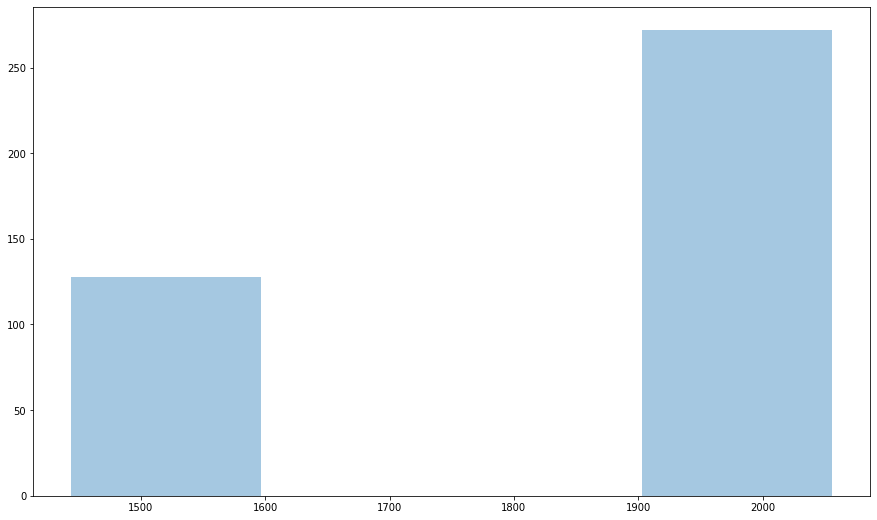

In [10]:
sns.distplot(a=w_list, kde=False)

# From the article

Input and Output
The pretrained Faster R-CNN ResNet-50 model that we are going to use expects the input image tensor to be in the form [n, c, h, w] and min size of 800px.
where

* n is the number of images
* c is the number of channels , for RGB images its 3
* h is the height of the image
* w is the widht of the image

The model will return

* Bounding boxes [x0, y0, x1, y1] all all predicted classes of shape (N,4) where N is the number of classes predicted by the model to be present in the image.
* Labels of all predicted classes.
* Scores of each predicted label.

## Download a pretrained Resnet50 Faster R-CNN model with pretrained weights.

In [0]:
import torch
import torchvision

model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d()
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d()
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d()
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d()
          (relu): ReLU(inplace=True)
          (downsample): Sequent

In [0]:
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]


* Image is obtained from the image path
* the image is converted to image tensor using PyTorch’s Transforms
* image is passed through the model to get the predictions
* class, box coordinates are obtained, but only prediction score > threshold are chosen.

In [0]:
# Note that we will use Pillow (PIL) module extensively with TorchVision 
# as it’s the default image backend supported by TorchVision.
# Import Pillow

from PIL import Image
from torchvision import transforms as T

In [0]:
def get_prediction(img_path, threshold):
  img = Image.open(img_path) # Load the image
  transform = T.Compose([T.ToTensor()]) # Defing PyTorch Transform
  img = transform(img) # Apply the transform to the image
  pred = model([img]) # Pass the image to the model
  pred_class = [COCO_INSTANCE_CATEGORY_NAMES[i] for i in list(pred[0]['labels'].numpy())] # Get the Prediction Score
  pred_boxes = [[(i[0], i[1]), (i[2], i[3])] for i in list(pred[0]['boxes'].detach().numpy())] # Bounding boxes
  pred_score = list(pred[0]['scores'].detach().numpy())
  pred_t = [pred_score.index(x) for x in pred_score if x > threshold][-1] # Get list of index with score greater than threshold.
  pred_boxes = pred_boxes[:pred_t+1]
  pred_class = pred_class[:pred_t+1]
  return pred_boxes, pred_class

* prediction is obtained from get_prediction method
*for each prediction, bounding box is drawn and text is written
with opencv
* the final image is displayed

In [0]:
!pip install opencv-python

In [0]:
import cv2
import matplotlib.pyplot as plt

In [0]:
def object_detection_api(img_path, threshold=0.5, rect_th=3, text_size=3, text_th=3):

  boxes, pred_cls = get_prediction(img_path, threshold) # Get predictions
  img = cv2.imread(img_path) # Read image with cv2
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Convert to RGB
  for i in range(len(boxes)):
    cv2.rectangle(img, boxes[i][0], boxes[i][1],color=(0, 255, 0), thickness=rect_th) # Draw Rectangle with the coordinates
    cv2.putText(img,pred_cls[i], boxes[i][0],  cv2.FONT_HERSHEY_SIMPLEX, text_size, (0,255,0),thickness=text_th) # Write the prediction class
  plt.figure(figsize=(20,30)) # display the output image
  plt.imshow(img)
  plt.xticks([])
  plt.yticks([])
  plt.show()


In [0]:
!wget https://www.wsha.org/wp-content/uploads/banner-diverse-group-of-people-2.jpg -O people.jpg

--2020-06-01 08:57:35--  https://www.wsha.org/wp-content/uploads/banner-diverse-group-of-people-2.jpg
Resolving www.wsha.org (www.wsha.org)... 104.198.7.33
Connecting to www.wsha.org (www.wsha.org)|104.198.7.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1923610 (1.8M) [image/jpeg]
Saving to: ‘people.jpg’

people.jpg          100%[===================>]   1.83M  --.-KB/s    in 0.008s  

2020-06-01 08:57:35 (236 MB/s) - ‘people.jpg’ saved [1923610/1923610]



/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


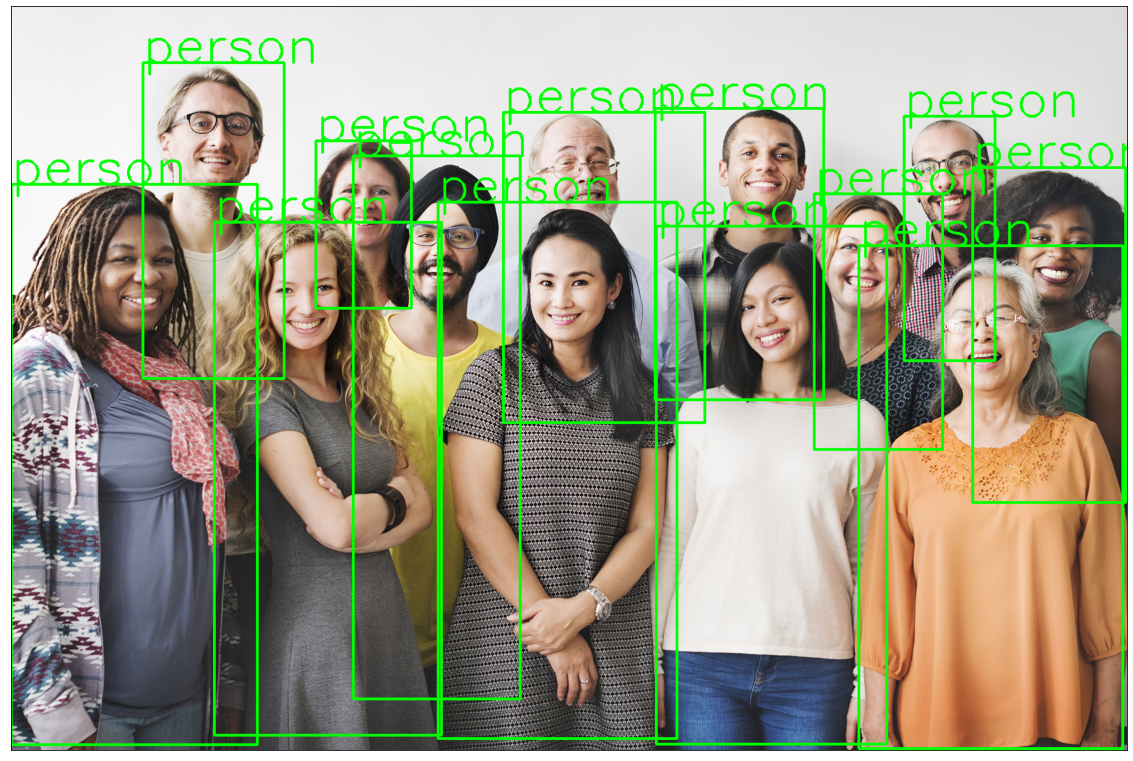

In [0]:
object_detection_api('people.jpg', threshold=0.8)

--2020-06-01 09:02:21--  https://images.unsplash.com/photo-1458169495136-854e4c39548a
Resolving images.unsplash.com (images.unsplash.com)... 151.101.54.208, 2a04:4e42:d::720
Connecting to images.unsplash.com (images.unsplash.com)|151.101.54.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1168686 (1.1M) [image/jpeg]
Saving to: ‘girl_cars.jpg’

girl_cars.jpg       100%[===================>]   1.11M  --.-KB/s    in 0.08s   

2020-06-01 09:02:21 (13.2 MB/s) - ‘girl_cars.jpg’ saved [1168686/1168686]



/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


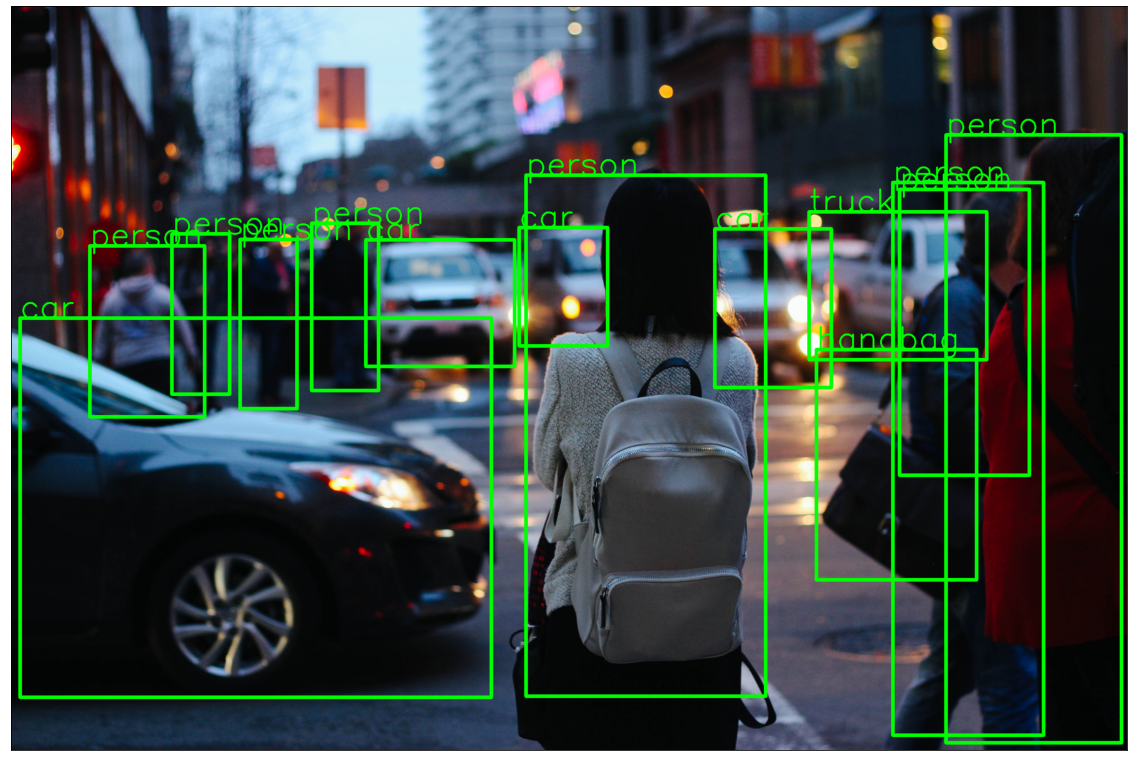

In [0]:
!wget https://images.unsplash.com/photo-1458169495136-854e4c39548a -O girl_cars.jpg

object_detection_api('./girl_cars.jpg', rect_th=15, text_th=7, text_size=5, threshold=0.8) 